In [118]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [119]:
# Import the data
emotion = pd.read_csv('/kaggle/input/multiclass-nlp/Emotions.csv')
violence = pd.read_csv('/kaggle/input/multiclass-nlp/Viol.csv')
hate = pd.read_csv('/kaggle/input/multiclass-nlp/Hate Speech.csv')

In [120]:
# Data format and copy the data
data_emotion = emotion.copy()
data_violence = violence.copy()
data_hate = hate.copy()

# Data Preprocessing

In [121]:
# Dropping the unwanted column
violence.drop(columns = ['Tweet_ID'],inplace = True)
emotion.drop(columns = ['Unnamed: 0'],inplace = True)
hate.drop(columns = ['Unnamed: 0'],inplace = True)

In [122]:
# Violence
hate

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [123]:
# Again removing unwanted columns
hate.drop(columns = ['count', 'hate_speech', 'offensive_language', 'neither'],inplace = True)

In [124]:
hate = hate[['tweet','class']]

In [125]:
emotion

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [126]:
# Printing all the columns
emotion.columns , violence.columns , hate.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [127]:
# renaming the columns name to same name
violence.rename(columns={'tweet':'text','type':'label'},inplace=True)
hate.rename(columns={'tweet':'text','class':'label'},inplace= True)

In [128]:
# Printing all the columns
emotion.columns , violence.columns , hate.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [129]:
# Checking for null value
print(emotion.isnull().sum())
print(violence.isnull().sum())
print(hate.isnull().sum())

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [130]:
# Checking Duplicate
print("Duplicate in violence dataframe :",violence.duplicated().sum())
print("Duplicate in emotion dataframe :",emotion.duplicated().sum())
print("Duplicate in hate dataframe :",hate.duplicated().sum())

Duplicate in violence dataframe : 6
Duplicate in emotion dataframe : 686
Duplicate in hate dataframe : 0


In [131]:
# Removing the duplicate Value
emotion.drop_duplicates(inplace=True)
violence.drop_duplicates(inplace=True)
hate.drop_duplicates(inplace=True)

In [132]:
# Checking Duplicate
print("Duplicate in violence dataframe :",violence.duplicated().sum())
print("Duplicate in emotion dataframe :",emotion.duplicated().sum())
print("Duplicate in hate dataframe :",hate.duplicated().sum())

Duplicate in violence dataframe : 0
Duplicate in emotion dataframe : 0
Duplicate in hate dataframe : 0


In [133]:
# Checking the shape
print("Shape of emotion dataframe :",emotion.shape)
print("Shape of violence dataframe :",violence.shape)
print("Shape of hate dataframe :",hate.shape)

Shape of emotion dataframe : (416123, 2)
Shape of violence dataframe : (39644, 2)
Shape of hate dataframe : (24783, 2)


* We want the equal number of rows from each dataset , so that unbalanced dataset should not create

In [134]:
emotion['label'].value_counts(), violence['label'].value_counts(), hate['label'].value_counts()

(label
 1    140779
 0    120989
 3     57235
 4     47664
 2     34497
 5     14959
 Name: count, dtype: int64,
 label
 sexual_violence                 32646
 Physical_violence                5946
 emotional_violence                648
 economic_violence                 217
 Harmful_Traditional_practice      187
 Name: count, dtype: int64,
 label
 1    19190
 2     4163
 0     1430
 Name: count, dtype: int64)



```
We will extract the dataset in same ration of labels
```



In [135]:
# Extracting 12000 rows
emotion_new = pd.DataFrame()
for i in range(len(emotion['label'].value_counts())):
  subset = emotion[emotion['label']==i].sample(n = 2000 , random_state=42)
  emotion_new = pd.concat([emotion_new,subset])

In [136]:
emotion_new.reset_index(drop=True,inplace=True)

In [137]:
# Now for the violence Dataframe
# We don't have much data, so we will combine lower value into one single category
sexual_voilence = violence[violence['label']=='sexual_violence'].sample(5002,random_state=42)
violence_df = violence[violence['label'] != 'sexual_violence']
violence_new = pd.concat([sexual_voilence,violence_df],axis = 0)

In [138]:
# Same for the hate
offensive = hate[hate['label']==1].sample(6407,random_state=42)
hate_df = hate[hate['label'] != 1]
hate_new = pd.concat([offensive,hate_df],axis = 0)

In [139]:
# Resetting the indexes
emotion_new.reset_index(drop=True,inplace=True)
violence_new.reset_index(drop=True,inplace=True)
hate_new.reset_index(drop=True,inplace=True)

## Label Encoding

* In Violence Data Frame we have categorical output column

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le = LabelEncoder()
violence_new['label'] = le.fit_transform(violence_new['label'])

# Textual Preprocessing

## a) Lower Case

In [142]:
def lower_case(text):
  return str(text).lower()

In [143]:
emotion_new['text']=emotion_new['text'].apply(lower_case)
violence_new['text']=violence_new['text'].apply(lower_case)
hate_new['text']=hate_new['text'].apply(lower_case)

In [144]:
emotion_new.head(2)

,text,label
0,i feel totally lost i just found out that my g...,0
1,i cooked the scallops a couple of days later b...,0


## b) Removing stripping

In [145]:
def remove_extra_space(text):
  return str(text).strip()

In [146]:
emotion_new['text']=emotion_new['text'].apply(remove_extra_space)
violence_new['text']=violence_new['text'].apply(remove_extra_space)
hate_new['text']=hate_new['text'].apply(remove_extra_space)

In [147]:
emotion_new.head(2)

,text,label
0,i feel totally lost i just found out that my g...,0
1,i cooked the scallops a couple of days later b...,0


## c) Unwanted charector

In [148]:
import re

In [149]:
def remove_special_chr(text):
  return re.sub(r'[^\w\d\s]','',str(text))

In [150]:
emotion_new['text']=emotion_new['text'].apply(remove_special_chr)
violence_new['text']=violence_new['text'].apply(remove_special_chr)
hate_new['text']=hate_new['text'].apply(remove_special_chr)

In [151]:
emotion_new.head(2)


,text,label
0,i feel totally lost i just found out that my g...,0
1,i cooked the scallops a couple of days later b...,0


# Tokenization

# Stopwords Removal

In [152]:
# Importing the required library for removing the stop words
import nltk
from nltk.corpus import stopwords
# Get all the stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [153]:
def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filtered_words = [word for word in all_words if word.lower() not in stop_words]
  return " ".join(filtered_words)

In [154]:
emotion_new['text'] = emotion_new['text'].apply(remove_stopwords)
violence_new['text'] = violence_new['text'].apply(remove_stopwords)
hate_new['text'] = hate_new['text'].apply(remove_stopwords)

In [155]:
hate_new.head(2)

,text,label
0,everytime go cracker barrel girl great tits se...,1
1,run nigga dont want nigga need bad bitch thats...,1


# Embedding

In [156]:
# Importing library required for the embedding
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [157]:
# Making class for tokenziation
tokenizer = Tokenizer()
# Creating token number for each word
tokenizer.fit_on_texts(pd.concat([emotion_new['text'], violence_new['text'],hate['text']]))

In [158]:
# Showing the tokenized number for each word
tokenizer.word_index

{'a': 1,
 'feel': 2,
 'bitch': 3,
 'rt': 4,
 'i': 5,
 'the': 6,
 'like': 7,
 'you': 8,
 'husband': 9,
 'beats': 10,
 'to': 11,
 'raped': 12,
 'feeling': 13,
 'and': 14,
 'my': 15,
 'that': 16,
 'im': 17,
 '128514': 18,
 't': 19,
 'bitches': 20,
 'in': 21,
 'http': 22,
 'co': 23,
 'get': 24,
 'is': 25,
 'me': 26,
 'of': 27,
 'on': 28,
 'hoes': 29,
 'be': 30,
 'got': 31,
 'know': 32,
 'pussy': 33,
 'this': 34,
 'for': 35,
 'one': 36,
 'amp': 37,
 'it': 38,
 'hoe': 39,
 'with': 40,
 'time': 41,
 'ass': 42,
 'would': 43,
 '8220': 44,
 'people': 45,
 'fuck': 46,
 '8221': 47,
 'dont': 48,
 'shit': 49,
 'u': 50,
 'love': 51,
 "i'm": 52,
 'still': 53,
 'said': 54,
 'really': 55,
 'your': 56,
 'all': 57,
 'up': 58,
 'if': 59,
 'want': 60,
 'but': 61,
 'man': 62,
 'just': 63,
 "don't": 64,
 'even': 65,
 'think': 66,
 'wife': 67,
 'go': 68,
 'so': 69,
 'woman': 70,
 'they': 71,
 'no': 72,
 'say': 73,
 'when': 74,
 'these': 75,
 'never': 76,
 'lol': 77,
 'nigga': 78,
 '8230': 79,
 'court': 80,
 't

In [159]:
# Getting the Sequence for each text
emotion_sequences = tokenizer.texts_to_sequences(emotion_new['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_new['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_new['text'])

In [160]:
# Getting the tokenized sentence 
print(emotion_new['text'].iloc[2])
print(emotion_sequences[2:3])

im good talking feelings without getting emotional im putting writing
[[17, 91, 216, 325, 262, 154, 1006, 17, 1082, 712]]


## Padding
* Padding we are doing for, getting the same number of array size for each input
*  Means every sentence should have same number of words

In [161]:
max_length = 100
emotion_pad = pad_sequences(emotion_sequences, padding = 'post',maxlen = max_length)
violence_pad = pad_sequences(violence_sequences, padding = 'post',maxlen = max_length)
hate_pad = pad_sequences(hate_sequences, padding = 'post',maxlen = max_length)

In [162]:
import numpy as np
emotion_pad

array([[    2,   779,   395, ...,     0,     0,     0],
       [ 4853, 20853,   586, ...,     0,     0,     0],
       [   17,    91,   216, ...,     0,     0,     0],
       ...,
       [   13,   420,    32, ...,     0,     0,     0],
       [   17,    13,   291, ...,     0,     0,     0],
       [ 1047,   155,  1440, ...,     0,     0,     0]], dtype=int32)

In [163]:
# generating labels in numpy array format
# Basically the output format
emotion_labels = np.array(emotion_new['label'])
violence_lables = np.array(violence_new['label'])
hate_labels = np.array(hate_new['label'])

# Model Definition

In [164]:
# Prepare Separate input for each dataset
emotion_input = emotion_pad
violence_input = violence_pad
hate_input = hate_pad

In [165]:
# Defining the multiple Input layers for each task
emotion_input_layer = keras.layers.Input(shape =(max_length,), name='emotion_input' )
violence_input_layer = keras.layers.Input(shape =(max_length,), name='violence_input' )
hate_input_layer = keras.layers.Input(shape =(max_length,), name='hate_input' )

In [166]:
# Use as embedding layer
embedding_layer =keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1 , output_dim = 128)

* Applying this embedding layer to each input

In [167]:
# Applying this embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [168]:
# Shared LSTM Layer
shared_lstm =  keras.layers.LSTM(64 , return_sequences = True)

In [169]:
# Apply all the layers
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [170]:
# Shared pooling and dropout layer
from keras.layers import Dropout, GlobalAveragePooling1D

In [171]:
# Shared global average pooling layer and dropout layer
shared_pooling = GlobalAveragePooling1D()
shared_dropout = Dropout(0.2)

In [172]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))                                  
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [173]:
# Checking the number of different output in each dataframe
len(emotion_new['label'].unique()) , len(violence_new['label'].unique()) , len(hate_new['label'].unique())

(6, 5, 3)

In [174]:
(emotion_new['label'].unique()) , (violence_new['label'].unique()) , (hate_new['label'].unique())

(array([0, 1, 2, 3, 4, 5]), array([4, 1, 3, 0, 2]), array([1, 2, 0]))

In [175]:
# Outpur layer
from keras.layers import Dense
emotion_output = Dense(6, activation = 'softmax',name = 'emotion_output')(emotion_features)
violence_output = Dense(5, activation = 'softmax',name = 'violence_output')(violence_features)
hate_output = Dense(3, activation = 'softmax',name = 'hate_output')(hate_features)

In [176]:
# Compile the model
model = keras.models.Model(inputs = [emotion_input_layer,violence_input_layer,hate_input_layer],
                          outputs = [emotion_output, violence_output, hate_output])
model.compile(optimizer = 'adam',
             loss={
                 'emotion_output':'sparse_categorical_crossentropy',
                 'violence_output':'sparse_categorical_crossentropy',
                 'hate_output':'sparse_categorical_crossentropy'
             },
             metrics = {
                 'emotion_output':'accuracy',
                 'violence_output':'accuracy',
                 'hate_output':'accuracy'
             })

In [177]:
# SUmmary of model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ emotion_input             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 100, 128)       │      6,770,688 │ emotion_input[0][0],   │
│                           │                        │                │ violence_input[0][0],  │
│                           │                        │                │ hate_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 100, 64)        │         49,408 │ embedding_3[0][0],     │
│                           │                        │                │ embedding_3[1][0],     │
│                           │                        │                │ embedding_3[2][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ lstm_1[0][0],          │
│ (GlobalAveragePooling1D)  │                        │                │ lstm_1[1][0],          │
│                           │                        │                │ lstm_1[2][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ emotion_output (Dense)    │ (None, 6)              │            390 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_output (Dense)   │ (None, 5)              │            325 │ dropout_1[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_output (Dense)       │ (None, 3)              │            195 │ dropout_1[2][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,821,006 (26.02 MB)

 Trainable params: 6,821,006 (26.02 MB)

 Non-trainable params: 0 (0.00 B)

In [192]:
# Training the model
history = model.fit(x = {
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input':hate_input},
          y = {
              'emotion_output':emotion_labels,
              'violence_output':violence_lables,
              'hate_output':hate_labels},
          epochs = 10,batch_size = 4
         
         )

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 325s 108ms/step - emotion_output_accuracy: 0.2155 - emotion_output_loss: 1.7723 - hate_output_accuracy: 0.6690 - hate_output_loss: 0.8082 - loss: 3.0566 - violence_output_accuracy: 0.8748 - violence_output_loss: 0.4762
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 323s 108ms/step - emotion_output_accuracy: 0.3917 - emotion_output_loss: 1.4898 - hate_output_accuracy: 0.8271 - hate_output_loss: 0.5293 - loss: 2.2448 - violence_output_accuracy: 0.9324 - violence_output_loss: 0.2257
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 381s 107ms/step - emotion_output_accuracy: 0.8285 - emotion_output_loss: 0.5683 - hate_output_accuracy: 0.8824 - hate_output_loss: 0.3218 - loss: 0.9574 - violence_output_accuracy: 0.9786 - violence_output_loss: 0.0673
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 323s 108ms/step - emotion_output_accuracy: 0.9318 - emotion_output_loss: 0.2341 - hate_output_accuracy: 0.9383 - hate_output_loss: 0.1872 - loss: 0.4390 - violence_output_accu

# Prediction and Evaluation

In [193]:
prediction = model.predict({
    'emotion_input':emotion_input,
    'violence_input':violence_input,
    'hate_input':hate_input
})

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


In [194]:
prediction

[array([[9.9980664e-01, 9.6580188e-05, 1.1095642e-05, 3.8138380e-05,
         4.1501757e-05, 6.1782175e-06],
        [9.9621570e-01, 3.1842347e-04, 1.8639112e-04, 1.7902884e-03,
         9.3372242e-04, 5.5558240e-04],
        [9.9964380e-01, 1.7662807e-05, 3.3668548e-06, 1.8821920e-04,
         1.4494285e-04, 2.1514359e-06],
        ...,
        [4.6995747e-06, 1.5259417e-05, 3.5188552e-06, 7.2427224e-07,
         4.8557986e-04, 9.9949008e-01],
        [7.2703708e-04, 5.7008734e-04, 3.7899899e-04, 4.0744970e-05,
         1.4420536e-01, 8.5407770e-01],
        [9.3985363e-06, 1.3055497e-05, 2.4060264e-06, 6.2249904e-07,
         3.3730557e-03, 9.9660146e-01]], dtype=float32),
 array([[1.6065690e-06, 8.8103093e-07, 2.7297182e-07, 1.0890460e-06,
         9.9999613e-01],
        [3.9987440e-06, 4.6971986e-06, 1.5957198e-06, 1.1751673e-05,
         9.9997789e-01],
        [1.2245030e-07, 6.7210425e-07, 2.8072063e-07, 7.4710482e-07,
         9.9999815e-01],
        ...,
        [3.6471201e-0

In [195]:
emotion_pred =  np.argmax(prediction[0],axis = 1)
violence_pred =  np.argmax(prediction[1],axis = 1)
hate_pred =  np.argmax(prediction[2],axis = 1)

In [196]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [197]:
import matplotlib.pyplot as plt

In [198]:
def plot_cm(true,pred,title,labels):
    cf = confusion_matrix(true,pred,normalize='true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf,annot=True,cmap = 'Blues',xticklabels=labels,yticklabels=labels)
    plt.title(title)
    plt.ylabel('actual')
    plt.xlabel('prediction')
emotion_labels_text = ['sadness','joy','love','anger','fear','surprise']
violence_labels_text = ['sexual_violence','physical_violence','emotional_violence','Harmful_traditional_practice','economic_violence']
hate_labels_text = ['offensive speech','Neither','Hate speech']

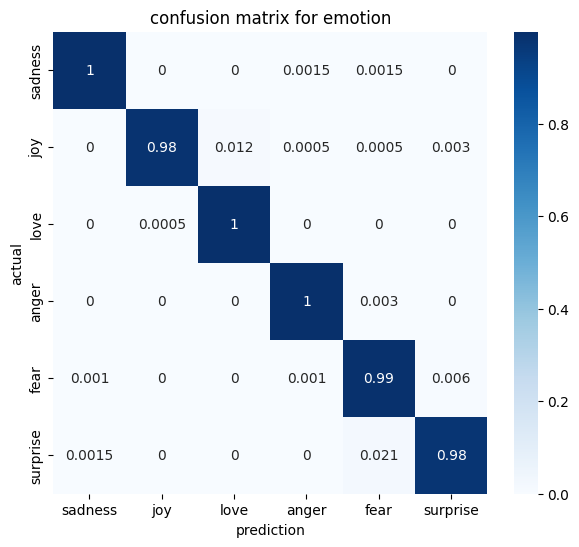

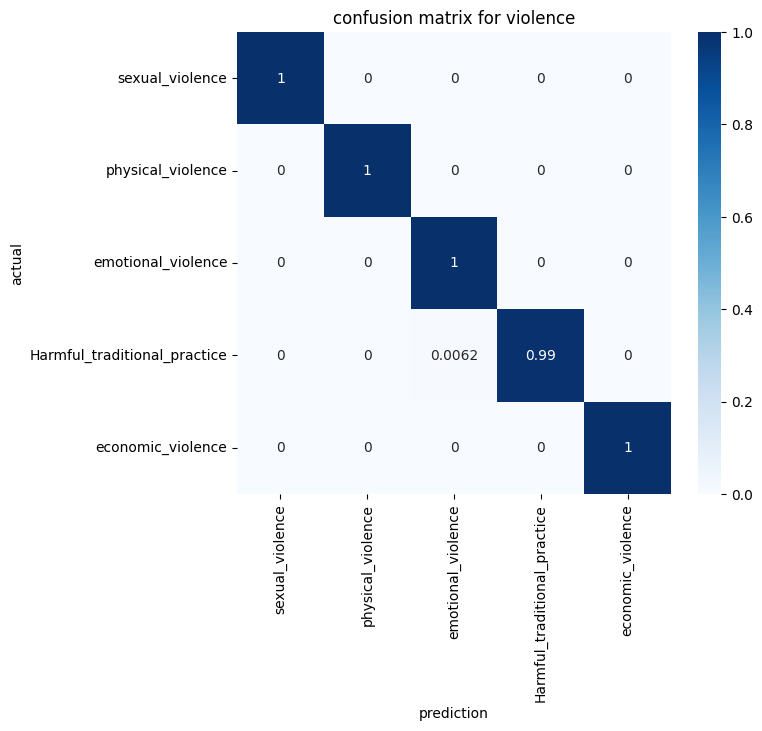

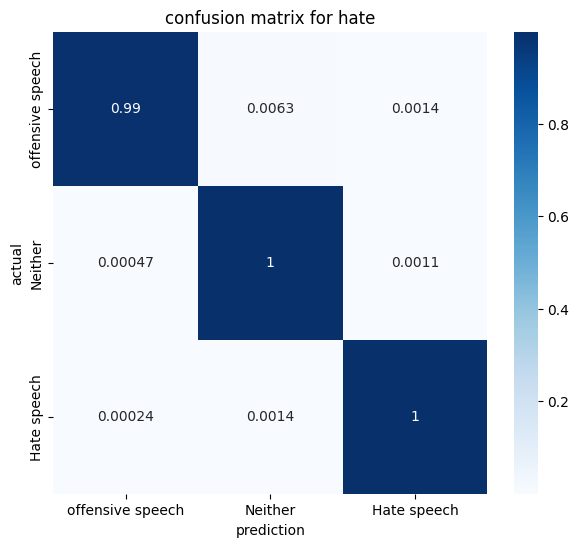

In [271]:
plot_cm(emotion_labels,emotion_pred,'confusion matrix for emotion',emotion_labels_text)
plot_cm(violence_lables,violence_pred,'confusion matrix for violence',violence_labels_text)
plot_cm(hate_labels,hate_pred,'confusion matrix for hate',hate_labels_text)

# Manual Testing

In [272]:
def classify_text(input_text):
    # preprocessing the input text
    lower_case_text = lower_case(str(input_text))
    remove_space = remove_extra_space(lower_case_text)
    remove_spc_char = remove_special_chr(remove_space)
    input_sequence = tokenizer.texts_to_sequences([remove_spc_char])
    input_padd = pad_sequences(input_sequence,maxlen = max_length,padding='post')
    # Prediction
    prediction = model.predict({
    'emotion_input':input_padd,
    'violence_input':input_padd,
    'hate_input':input_padd
    })
    emotion_pred =  np.argmax(prediction[0],axis = 1)[0]
    violence_pred =  np.argmax(prediction[1],axis = 1)[0]
    hate_pred =  np.argmax(prediction[2],axis = 1)[0]

    # Determine major label
    major_labels = ['Emotion','Violence','Hate']
    major_label_index = np.argmax([np.max(prediction[0]),np.max(prediction[1]),np.max(prediction[2])])
    major_label = major_labels[major_label_index]

    # determing sub lables
    emotion_labels_text = ['sadness','joy','love','anger','fear','surprise']
    violence_labels_text = ['sexual_violence','physical_violence','emotional_violence','Harmful_traditional_practice','economic_violence']
    hate_labels_text = ['offensive speech','Neither','Hate speech']
    if major_labels == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_labels == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]
    return major_label, sub_label
    

In [287]:
# Checking the output
classify_text('Why try and be cute about serial killers I swear to fucking god this drives me crazy yâ€™all understand he raped and murdered however many people right? Whatâ€™s sexy about rape? Whatâ€™s sexy about murder? Fuck offfff')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


('Violence', 'offensive speech')

In [252]:
import ipywidgets as widgets
from IPython.display import display

In [253]:
# define a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text',
    placeholder = 'Enter you text'
)

In [254]:
# Define classify button
button = widgets.Button(description ='classify')


In [255]:
# define an output area to display result
output = widgets.Output()

In [256]:
# Function to handle event
def on_button_click(b):
    output.clear_output() # clear the previous output
    input_text = input_text_widget.value
    major_label,sub_label =  classify_text(input_text)
    print(f'Major Label :{major_label}')
    print(f'Sub Label : {sub_label}')
    # Attach button at bottom
button.on_click(on_button_click)

In [263]:
display(input_text_widget,button,output)

Text(value='i am afraid', description='Input text', placeholder='Enter you text')

Button(description='classify', style=ButtonStyle())

Output()